<a href="https://colab.research.google.com/github/mmppppss/IA_algorithms/blob/main/reconocimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import requests
import os

from google.colab import userdata
PEXELS_API_KEY = userdata.get('pexelsKEY')

output_folder = "drive/MyDrive/IA/images/gatos"
os.makedirs(output_folder, exist_ok=True)

def download_images(query, count=5):
    headers = {"Authorization": PEXELS_API_KEY}
    url = f"https://api.pexels.com/v1/search?query={query}&per_page={count}"
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        image_count = 0

        for photo in data["photos"]:
            image_url = photo["src"]["original"]
            img_data = requests.get(image_url).content

            file_name = os.path.join(output_folder, f"image_{image_count}.jpg")
            with open(file_name, 'wb') as img_file:
                img_file.write(img_data)

            print(f"Imagen guardada: {file_name}")
            image_count += 1
    else:
        print("Error al obtener imágenes de Pexels")

# Usa la función para descargar imágenes de una búsqueda específica
download_images("gato naranja", count=20)
output_folder = "drive/MyDrive/IA/images/perros"
os.makedirs(output_folder, exist_ok=True)
download_images("perro marron", count=20)



Imagen guardada: drive/MyDrive/IA/images/gatos/image_0.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_1.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_2.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_3.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_4.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_5.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_6.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_7.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_8.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_9.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_10.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_11.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_12.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_13.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_14.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/image_15.jpg
Imagen guardada: drive/MyDrive/IA/images/gatos/ima

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [5]:
train_dir = 'drive/MyDrive/IA/images'
test_dir = 'drive/MyDrive/IA/test'

# Preprocesamiento y aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 40 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [6]:
modelo = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compilar el modelo
modelo.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
historia = modelo.fit(train_generator, epochs=30, validation_data=test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.5979 - loss: 0.6920 - val_accuracy: 0.5000 - val_loss: 0.9738
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5104 - loss: 0.7077 - val_accuracy: 0.5000 - val_loss: 0.7746
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 11s/step - accuracy: 0.5833 - loss: 0.7513 - val_accuracy: 0.5000 - val_loss: 0.8055
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5000 - loss: 0.7292 - val_accuracy: 0.0000e+00 - val_loss: 0.7135
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 10s/step - accuracy: 0.7333 - loss: 0.6554 - val_accuracy: 0.5000 - val_loss: 0.7104
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5104 - loss: 0.6233 - val_accuracy: 0.5000 - val_loss: 0.7893
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 10s/step - accuracy: 0.5833 - loss: 0.5653 - val_accuracy: 0.5000 - val_loss: 0.7919
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 11s/step - accuracy: 0.7250 - loss: 0.5809 - val_accuracy: 0.5000 - val_loss: 0.7601


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.5000 - loss: 2.9337
Precisión en datos de prueba: 0.5


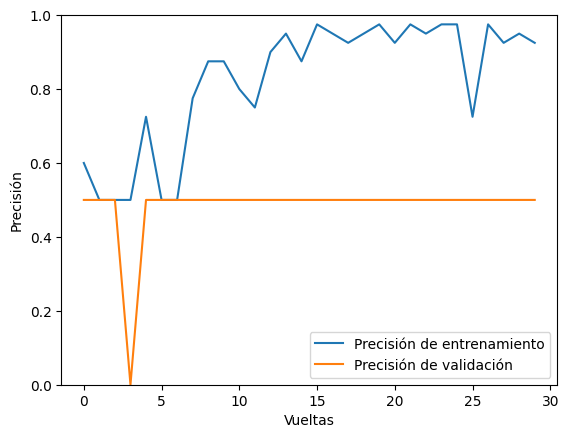

In [8]:
# Evaluar el modelo
test_loss, test_acc = modelo.evaluate(test_generator)
print('Precisión en datos de prueba:', test_acc)

# Graficar la precisión de entrenamiento y validación a lo largo del tiempo
plt.plot(historia.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historia.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Vueltas')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [12]:
from ipywidgets import FileUpload
from IPython.display import display
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import io # Import the io module

# Crear un selector de archivos interactivo
uploader = FileUpload()
display(uploader)

# Esperar a que el usuario cargue la imagen
def on_upload_change(change):
    for filename, file in uploader.value.items():
        # Wrap file content in BytesIO to handle potential binary data
        # and ensure it's treated as an in-memory file-like object
        img = image.load_img(io.BytesIO(file['content']), target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        # Realizar la predicción
        prediccion = modelo.predict(img_array)

        # Interpretar la salida
        print("Predicción:", prediccion)
        if prediccion[0][0] < 0.5:
            print("Predicción: GATO")
        else:
            print("Predicción: Clase PERRO")

# Asociar la función de cambio
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicción: [[0.99999976]]
Predicción: Clase PERRO
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicción: [[0.972815]]
Predicción: Clase PERRO
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicción: [[0.2757034]]
Predicción: GATO
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicción: [[0.9993954]]
Predicción: Clase PERRO
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicción: [[0.99575806]]
Predicción: Clase PERRO
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicción: [[0.9971577]]
Predicción: Clase PERRO
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicción: [[0.99976075]]
Predicción: Clase PERRO
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicción: [[0.9789735]]
Predicción: Clase PERRO
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicción: [[0.33214256]]
Predicción: GATO
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicción: [[0.99976075]]
Predicción: Clase PERRO
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicción: [[0.9971577]]
Predicción: Clase PERRO
